In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_hist = pd.read_csv('data/diamonds_final.csv')
df_hist

city_id        city  \
0      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
1      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
2      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
3      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
4      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
...                                                  ...         ...   
40450  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40451  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40452  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40453  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40454  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   

                                                index_id  price  carat  \
0      5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...   6216   1.00   
1      624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da5760...   4969   1.16   
2      86e50149658661312a9e0b35558d84f6c6d3da797f552a...   2422   0.70   
3      3d914f9348c9cc0ff8a79716700b9fcd4d2f3e71160800...   3861   1.04   
4      8722616204217eddb39e7df969e0698aed8e599ba62ed2...   2440   0.78   
...                                                  ...    ...    ...   
40450  6a4490713063ded3aad43f37c39037f1884a12813910ca...   7840   1.50   
40451  eb1bc92524487e990af750137fa20dab6ae30ebb315ecf...   1058   0.39   
40452  c6f09db9685f34691490390033c37b1bd7b13a7c6a4d48...  17392   2.02   
40453  78b20395c3a5ff8777fb523373d519e5fede4917f1b175...   1436   0.50   
40454  7afd6e514955f8dfb1f8540762c06dd1af7e59f7772d04...  18198   2.07   

                                              clarity_id clarity  \
0      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...     VS2   
1      03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
2      ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...     VS1   
3      03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
4      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...     VS2   
...                                                  ...     ...   
40450  3f9db06236e9719b61c826b612b882fa702ec81574e44c...    VVS2   
40451  3f9db06236e9719b61c826b612b882fa702ec81574e44c...    VVS2   
40452  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...     SI1   
40453  f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...     VS2   
40454  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   

                                                  cut_id  \
0      de88c121a82a06352bf1aaceba20578356408a334ba046...   
1      de88c121a82a06352bf1aaceba20578356408a334ba046...   
2      388655e25e91872329272fc10128ef5354b3b19a05d7e8...   
3      de88c121a82a06352bf1aaceba20578356408a334ba046...   
4      c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
...                                                  ...   
40450  388655e25e91872329272fc10128ef5354b3b19a05d7e8...   
40451  c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
40452  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40453  de88c121a82a06352bf1aaceba20578356408a334ba046...   
40454  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   

                                                color_id color        cut  \
0      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...     G    Premium   
1      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...     G    Premium   
2      44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...     H  Very Good   
3      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...     G    Premium   
4      44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...     H       Good   
...                                                  ...   ...        ...   
40450  6da43b944e494e885e69af021f93c6d9331c78aa228084...     J  Very Good   
40451  f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...     F       Good   
40452  44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...     H  

In [3]:
# checking if there are any null values
df_hist.isnull().sum()

city_id       0
city          0
index_id      0
price         0
carat         0
clarity_id    0
clarity       0
cut_id        0
color_id      0
color         0
cut           0
depth         0
table         0
x             0
y             0
z             0
dtype: int64

In [4]:
#Checking the basic statistics
df_hist.describe().T

count         mean          std    min     25%      50%       75%  \
price  40455.0  3928.444469  3992.416147  326.0  945.00  2397.00  5331.000   
carat  40455.0     0.797706     0.475544    0.2    0.40     0.70     1.040   
depth  40455.0    61.752841     1.431725   43.0   61.00    61.80    62.500   
table  40455.0    57.446133     2.233535   43.0   56.00    57.00    59.000   
x      40455.0     5.729392     1.124453    0.0    4.71     5.69     6.540   
y      40455.0     5.732819     1.146650    0.0    4.72     5.71     6.540   
z      40455.0     3.537154     0.697062    0.0    2.91     3.52     4.035   

            max  
price  18823.00  
carat      4.50  
depth     79.00  
table     95.00  
x         10.23  
y         58.90  
z          8.06

In [5]:
# there are zero values in the 'min' values, let's check how many
len(df_hist.loc[(df_hist["x"] == 0) | (df_hist["y"] == 0) | (df_hist["z"] == 0)])

16

In [6]:
df_hist.loc[(df_hist["x"] == 0) | (df_hist["y"] == 0) | (df_hist["z"] == 0)]
df_hist = df_hist[(df_hist[["x", "y", "z"]] != 0).all(axis=1)].reset_index()
df_hist = df_hist.drop("index", axis=1)

In [7]:
# double check if lines have been dropped
df_hist.shape

(40439, 16)

In [8]:
# double check if we have now a min value not equal to zero
df_hist.describe().T


count         mean          std     min     25%      50%      75%  \
price  40439.0  3926.535448  3990.024501  326.00  945.00  2396.00  5329.50   
carat  40439.0     0.797425     0.475257    0.20    0.40     0.70     1.04   
depth  40439.0    61.753013     1.431306   43.00   61.00    61.80    62.50   
table  40439.0    57.445543     2.233055   43.00   56.00    57.00    59.00   
x      40439.0     5.729616     1.122384    3.77    4.71     5.69     6.54   
y      40439.0     5.732897     1.145002    3.72    4.72     5.71     6.54   
z      40439.0     3.538553     0.693639    1.07    2.91     3.52     4.04   

            max  
price  18823.00  
carat      4.50  
depth     79.00  
table     95.00  
x         10.23  
y         58.90  
z          8.06

In [9]:
hex_string = '0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039eeba82d1891acf0d61'
integer_value = int(hex_string, 16)  # Convert hexadecimal string to integer
print("Integer value:", integer_value)


Integer value: 34896088963477374428403905863896877428649047015501684379032187825101409633


In [10]:
#Checking correlations
numeric_columns = df_hist.select_dtypes(include=['number'])

# Calculate correlation matrix
corr = numeric_columns.corr()
corr

price     carat     depth     table         x         y         z
price  1.000000  0.921881 -0.014923  0.130170  0.887850  0.867756  0.882131
carat  0.921881  1.000000  0.026585  0.183347  0.977901  0.953386  0.976326
depth -0.014923  0.026585  1.000000 -0.293093 -0.026190 -0.030803  0.094575
table  0.130170  0.183347 -0.293093  1.000000  0.197229  0.185826  0.157398
x      0.887850  0.977901 -0.026190  0.197229  1.000000  0.974044  0.990932
y      0.867756  0.953386 -0.030803  0.185826  0.974044  1.000000  0.971019
z      0.882131  0.976326  0.094575  0.157398  0.990932  0.971019  1.000000

/Users/nataliavargas/miniconda3/envs/m3_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliavargas/miniconda3/envs/m3_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliavargas/miniconda3/envs/m3_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliavargas/miniconda3/envs/m3_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning

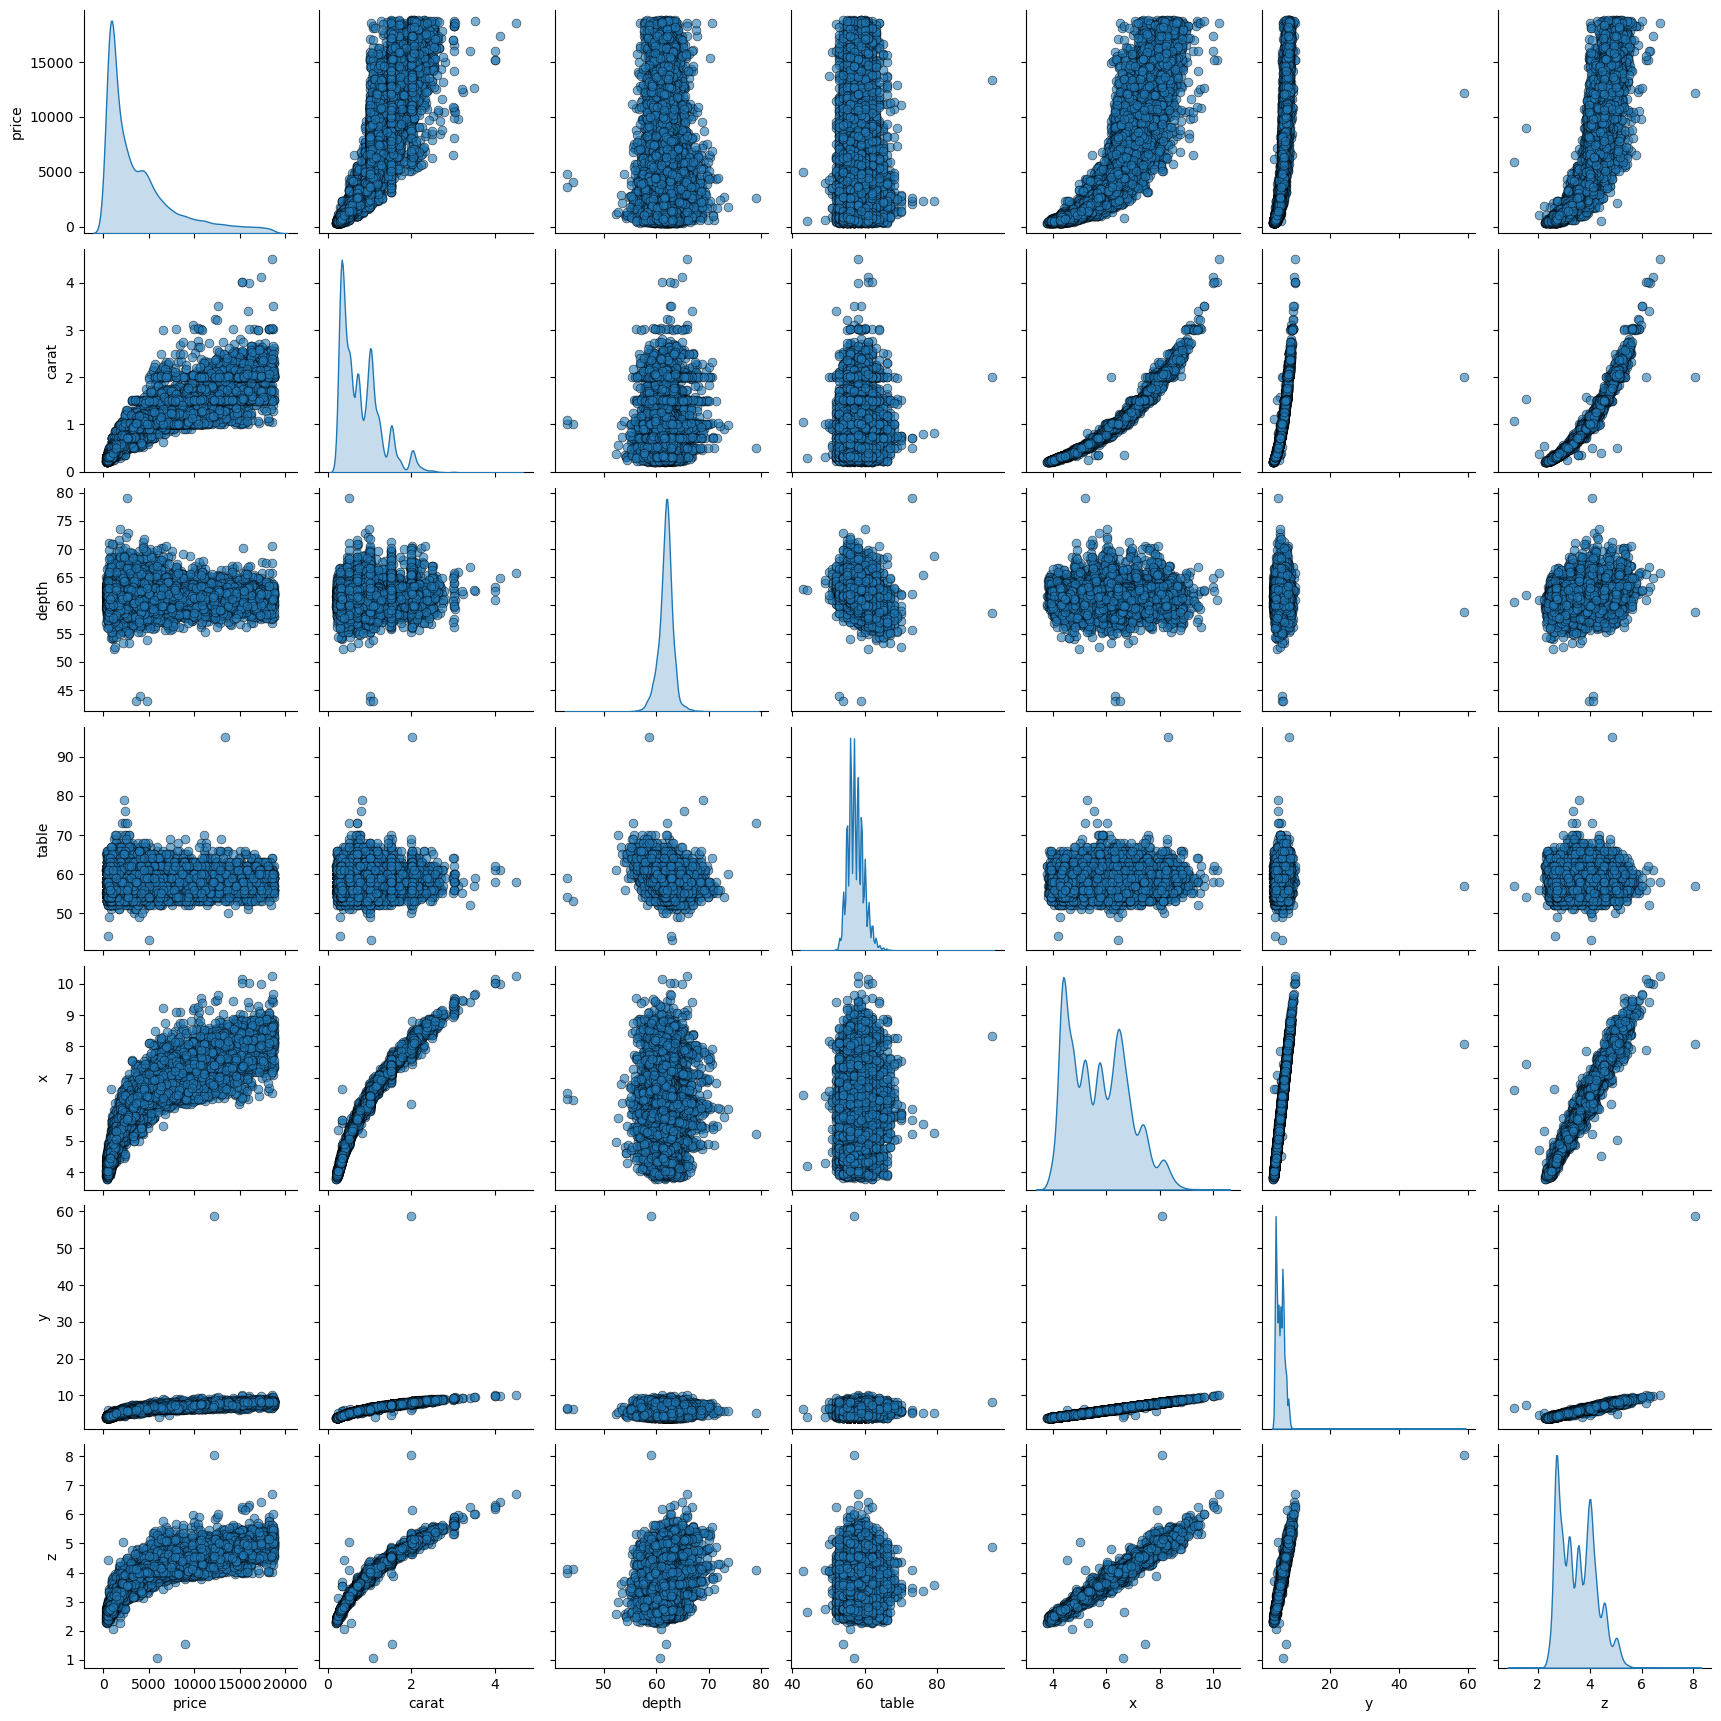

In [11]:
sns.pairplot(
    df_hist, diag_kind="kde", plot_kws={"alpha": 0.6, "s": 40, "edgecolor": "k"}
);

/Users/nataliavargas/miniconda3/envs/m3_env/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


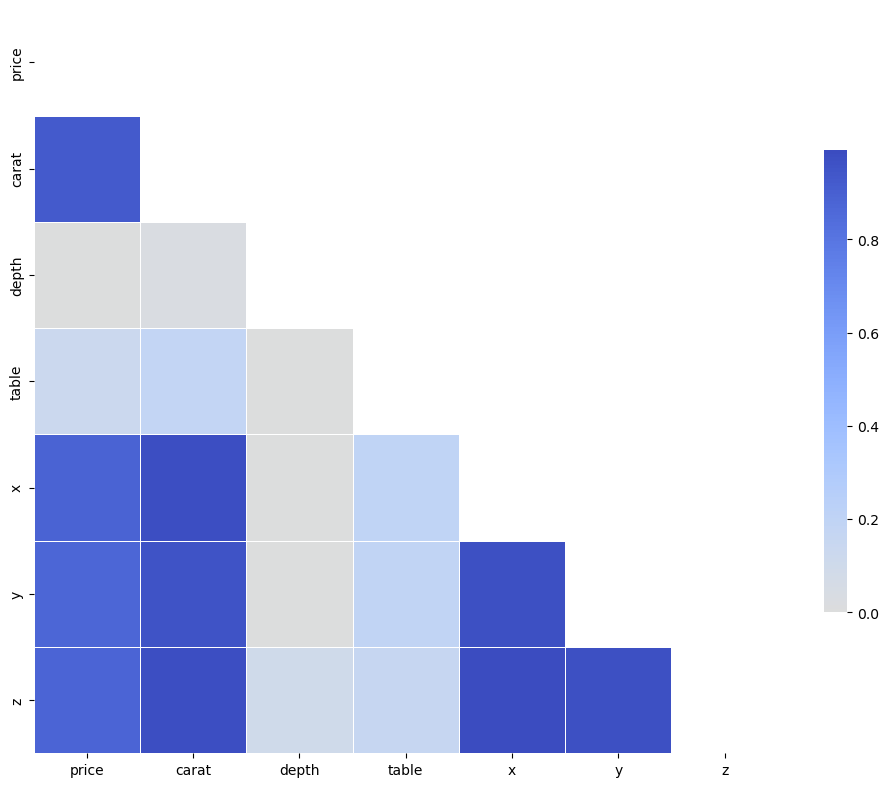

In [12]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm_r",
    vmin=0.0,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
);


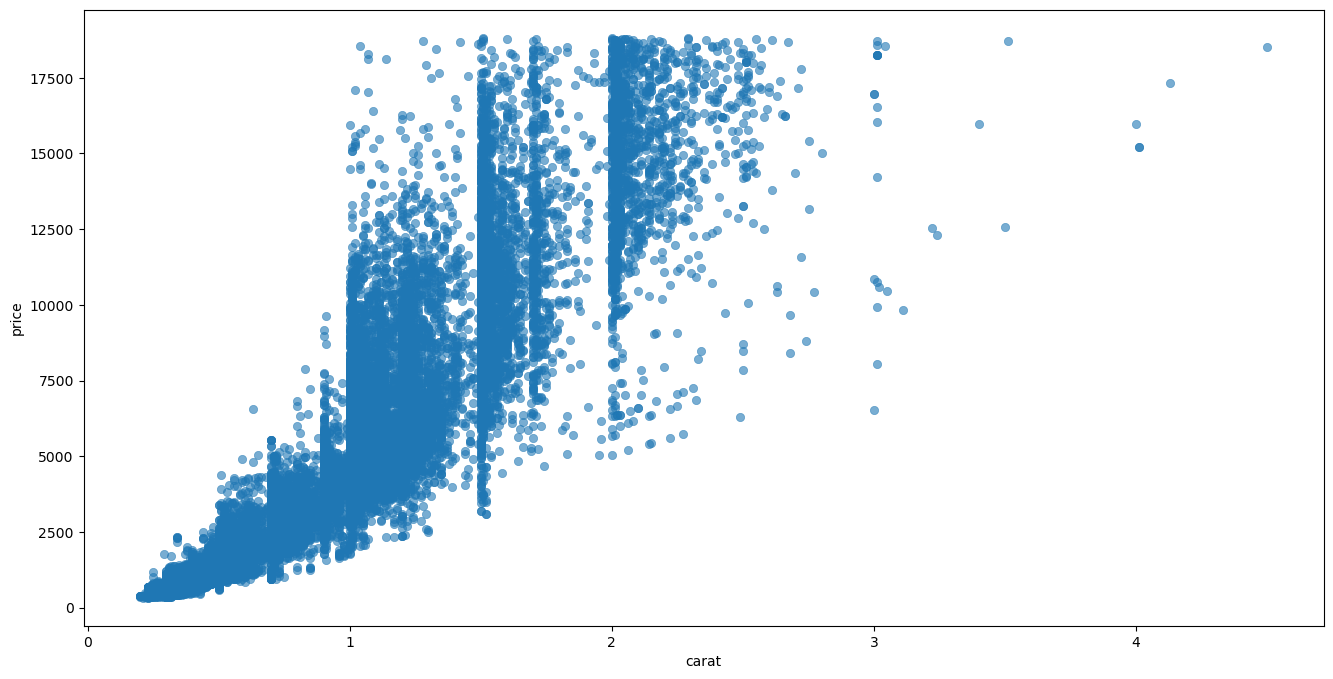

In [13]:
#Correlation 'price' and 'carat'
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x="carat", y="price", edgecolor=None, alpha=0.6);

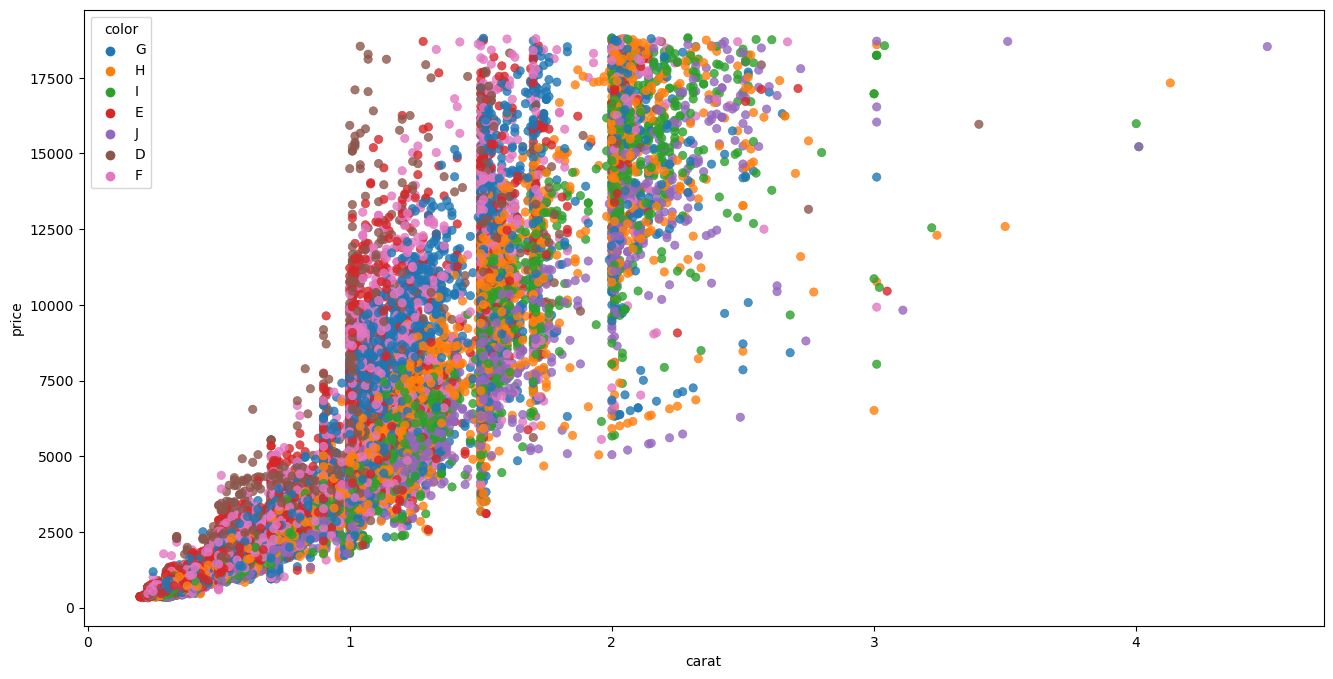

In [14]:
#Correlation 'price' and 'carat' associated to 'color'
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist, x="carat", y="price", hue="color", edgecolor=None, alpha=0.8
);


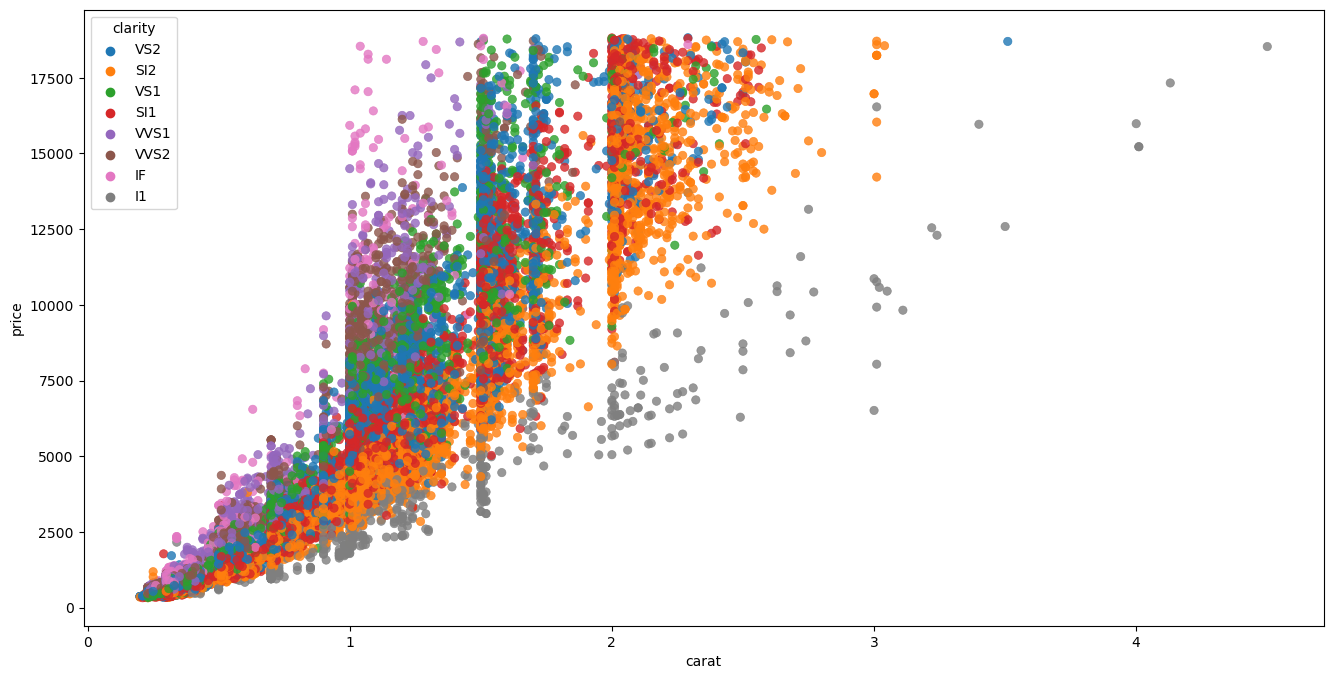

In [15]:
#Correlation 'price' and 'carat' associated to 'clarity'
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist, x="carat", y="price", hue="clarity", edgecolor=None, alpha=0.8
);

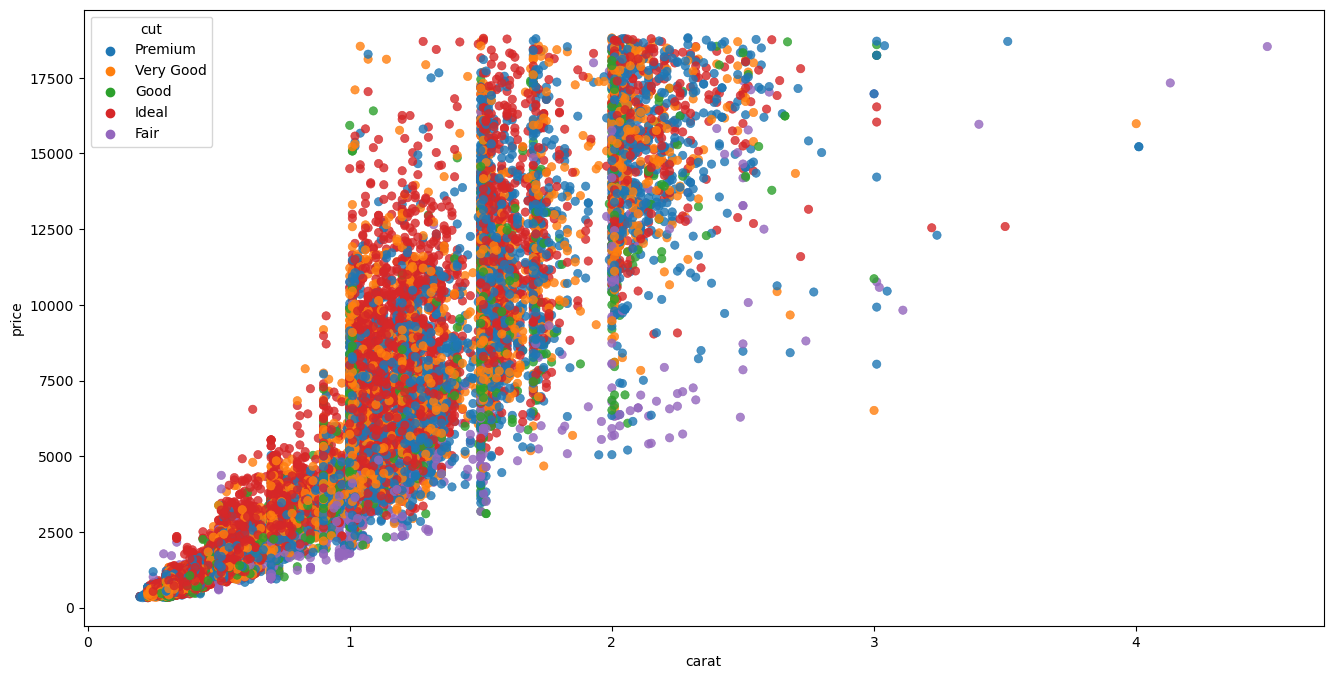

In [16]:
#Correlation 'price' and 'carat' associated to 'cut'
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist, x="carat", y="price", hue="cut", edgecolor=None, alpha=0.8
);

In [17]:
df_hist["carat_log"] = np.log(df_hist["carat"])
df_hist["price_log"] = np.log(df_hist["price"])
df_hist

city_id        city  \
0      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
1      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
2      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
3      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
4      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
...                                                  ...         ...   
40434  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40435  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40436  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40437  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40438  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   

                                                index_id  price  carat  \
0      5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...   6216   1.00   
1      624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da5760...   4969   1.16   
2      86e50149658661312a9e0b35558d84f6c6d3da797f552a...   2422   0.70   
3      3d914f9348c9cc0ff8a79716700b9fcd4d2f3e71160800...   3861   1.04   
4      8722616204217eddb39e7df969e0698aed8e599ba62ed2...   2440   0.78   
...                                                  ...    ...    ...   
40434  6a4490713063ded3aad43f37c39037f1884a12813910ca...   7840   1.50   
40435  eb1bc92524487e990af750137fa20dab6ae30ebb315ecf...   1058   0.39   
40436  c6f09db9685f34691490390033c37b1bd7b13a7c6a4d48...  17392   2.02   
40437  78b20395c3a5ff8777fb523373d519e5fede4917f1b175...   1436   0.50   
40438  7afd6e514955f8dfb1f8540762c06dd1af7e59f7772d04...  18198   2.07   

                                              clarity_id clarity  \
0      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...     VS2   
1      03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
2      ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...     VS1   
3      03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
4      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...     VS2   
...                                                  ...     ...   
40434  3f9db06236e9719b61c826b612b882fa702ec81574e44c...    VVS2   
40435  3f9db06236e9719b61c826b612b882fa702ec81574e44c...    VVS2   
40436  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...     SI1   
40437  f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...     VS2   
40438  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   

                                                  cut_id  \
0      de88c121a82a06352bf1aaceba20578356408a334ba046...   
1      de88c121a82a06352bf1aaceba20578356408a334ba046...   
2      388655e25e91872329272fc10128ef5354b3b19a05d7e8...   
3      de88c121a82a06352bf1aaceba20578356408a334ba046...   
4      c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
...                                                  ...   
40434  388655e25e91872329272fc10128ef5354b3b19a05d7e8...   
40435  c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
40436  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40437  de88c121a82a06352bf1aaceba20578356408a334ba046...   
40438  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   

                                                color_id color        cut  \
0      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...     G    Premium   
1      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...     G    Premium   
2      44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...     H  Very Good   
3      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...     G    Premium   
4      44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...     H       Good   
...                                                  ...   ...        ...   
40434  6da43b944e494e885e69af021f93c6d9331c78aa228084...     J  Very Good   
40435  f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...     F       Good   
40436  44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...     H  

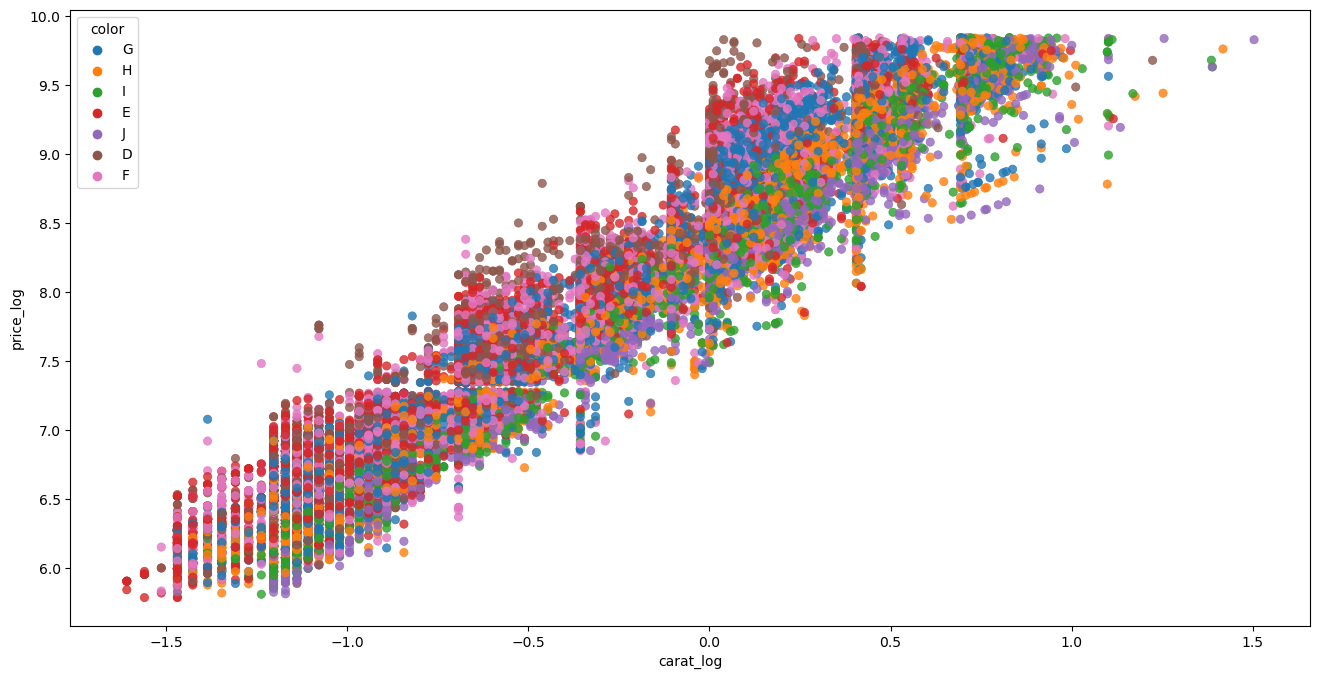

In [18]:
#Correlation 'price_log' and 'carat_log' associated to 'color'
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist, x="carat_log", y="price_log", hue="color", edgecolor=None, alpha=0.8
);

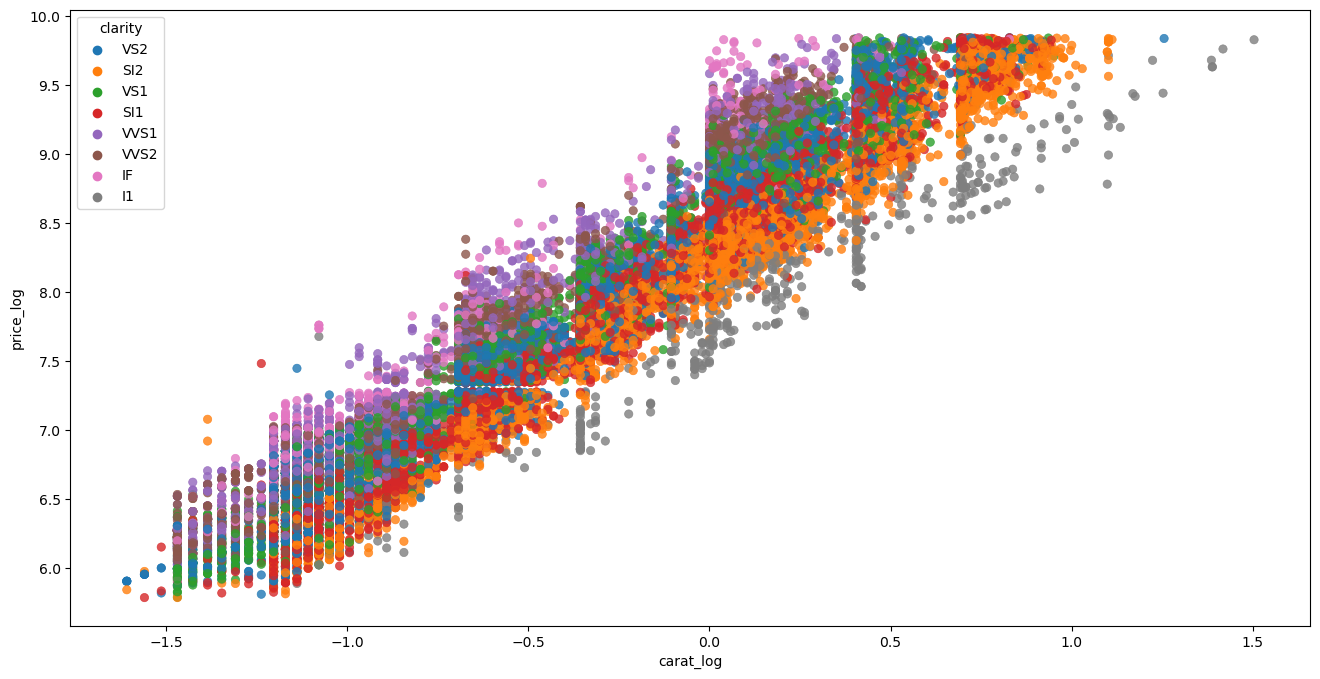

In [19]:
#Correlation 'price_log' and 'carat_log' associated to 'clarity'
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist, x="carat_log", y="price_log", hue="clarity", edgecolor=None, alpha=0.8
);

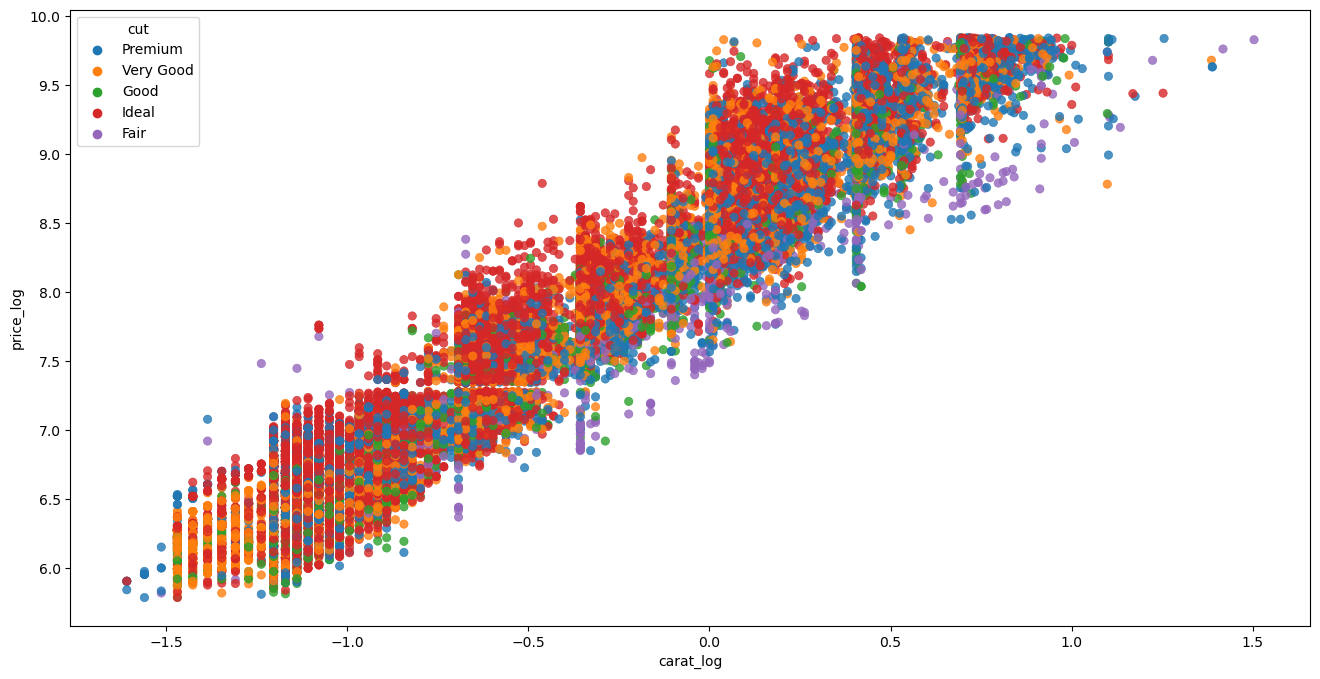

In [20]:
#Correlation 'price_log' and 'carat_log' associated to 'cut'
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist, x="carat_log", y="price_log", hue="cut", edgecolor=None, alpha=0.8
);


In [21]:
#Creating dictionaries with numeric values for categories 'cut', 'color' and 'clarity'
# 'cut' quality range varies from 1 ('Fair') to 5 ('Ideal')
cut_quality = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}

# 'color' quality range varies from 1 ('J') to 7 ('D')
color_quality = {"D": 7, "E": 6, "F": 5, "G": 4, "H": 3, "I": 2, "J": 1}

# 'clarity' quality range varies from 1 ('I1') to 7 ('IF')
clarity_quality = {
    "I1": 1,
    "SI2": 2,
    "SI1": 3,
    "VS2": 4,
    "VS1": 5,
    "VVS2": 5,
    "VVS1": 6,
    "IF": 7,
}

In [22]:
df_hist["cut_quality"] = df_hist["cut"].apply(lambda x: cut_quality[x])
df_hist["color_quality"] = df_hist["color"].apply(lambda x: color_quality[x])
df_hist["clarity_quality"] = df_hist["clarity"].apply(lambda x: clarity_quality[x])
df_hist

city_id        city  \
0      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
1      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
2      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
3      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
4      0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
...                                                  ...         ...   
40434  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40435  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40436  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40437  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40438  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   

                                                index_id  price  carat  \
0      5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...   6216   1.00   
1      624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da5760...   4969   1.16   
2      86e50149658661312a9e0b35558d84f6c6d3da797f552a...   2422   0.70   
3      3d914f9348c9cc0ff8a79716700b9fcd4d2f3e71160800...   3861   1.04   
4      8722616204217eddb39e7df969e0698aed8e599ba62ed2...   2440   0.78   
...                                                  ...    ...    ...   
40434  6a4490713063ded3aad43f37c39037f1884a12813910ca...   7840   1.50   
40435  eb1bc92524487e990af750137fa20dab6ae30ebb315ecf...   1058   0.39   
40436  c6f09db9685f34691490390033c37b1bd7b13a7c6a4d48...  17392   2.02   
40437  78b20395c3a5ff8777fb523373d519e5fede4917f1b175...   1436   0.50   
40438  7afd6e514955f8dfb1f8540762c06dd1af7e59f7772d04...  18198   2.07   

                                              clarity_id clarity  \
0      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...     VS2   
1      03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
2      ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...     VS1   
3      03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
4      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...     VS2   
...                                                  ...     ...   
40434  3f9db06236e9719b61c826b612b882fa702ec81574e44c...    VVS2   
40435  3f9db06236e9719b61c826b612b882fa702ec81574e44c...    VVS2   
40436  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...     SI1   
40437  f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...     VS2   
40438  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   

                                                  cut_id  \
0      de88c121a82a06352bf1aaceba20578356408a334ba046...   
1      de88c121a82a06352bf1aaceba20578356408a334ba046...   
2      388655e25e91872329272fc10128ef5354b3b19a05d7e8...   
3      de88c121a82a06352bf1aaceba20578356408a334ba046...   
4      c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
...                                                  ...   
40434  388655e25e91872329272fc10128ef5354b3b19a05d7e8...   
40435  c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
40436  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40437  de88c121a82a06352bf1aaceba20578356408a334ba046...   
40438  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   

                                                color_id color  ... depth  \
0      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...     G  ...  61.6   
1      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...     G  ...  62.5   
2      44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...     H  ...  62.1   
3      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...     G  ...  62.2   
4      44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...     H  ...  63.7   
...                                                  ...   ...  ...   ...   
40434  6da43b944e494e885e69af021f93c6d9331c78aa228084...     J  ...  62.8   
40435  f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...     F  ...  57.7   
40436  44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...     H  

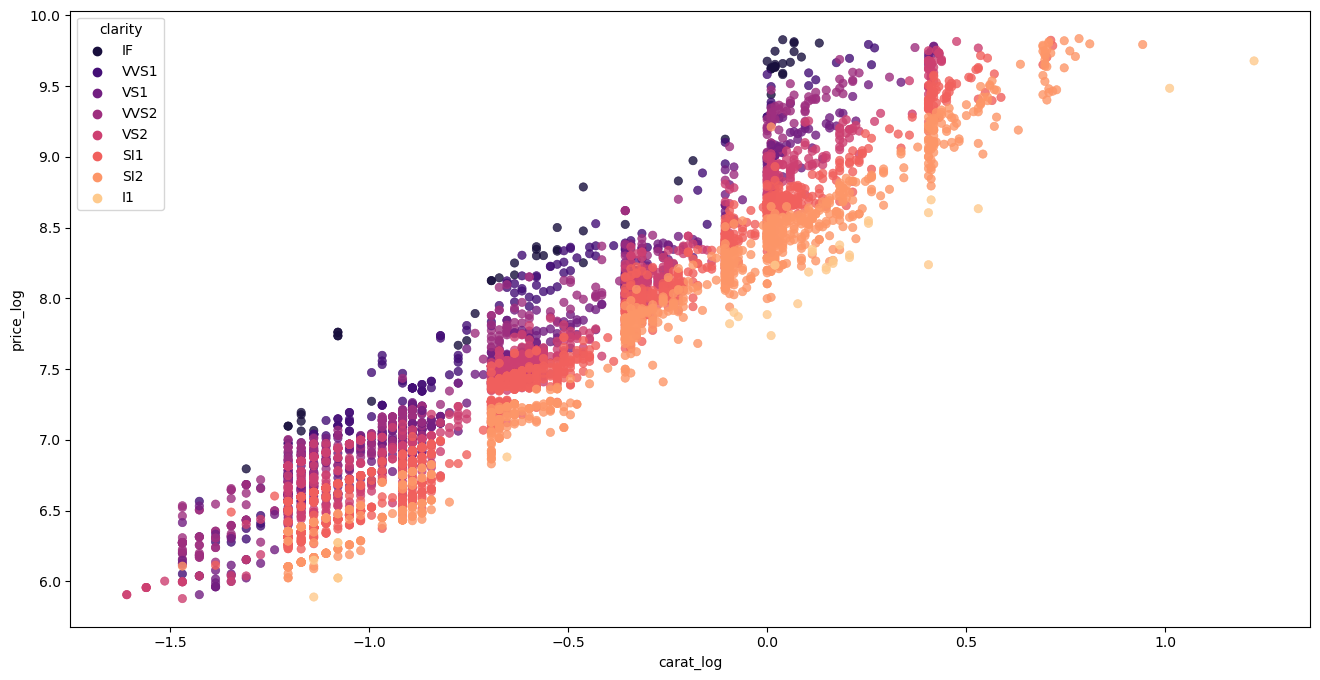

In [23]:
#Checking the influence of the 'clarity' variable for a specific color
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist[df_hist["color"] == "D"].sort_values(
        "clarity_quality", ascending=False
    ),
    x="carat_log",
    y="price_log",
    hue="clarity",
    edgecolor=None,
    palette="magma",
    alpha=0.8,
);

In [24]:
#Simple Linear Regression
#without any kind of filter
X = df_hist[["carat"]]  # feature - dataframe format
Y = df_hist["price"]  # target - series format
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [25]:
model.coef_

array([7739.65179118])

In [26]:
model.intercept_

-2245.2583763760017

In [27]:
predict_price = model.predict(X)

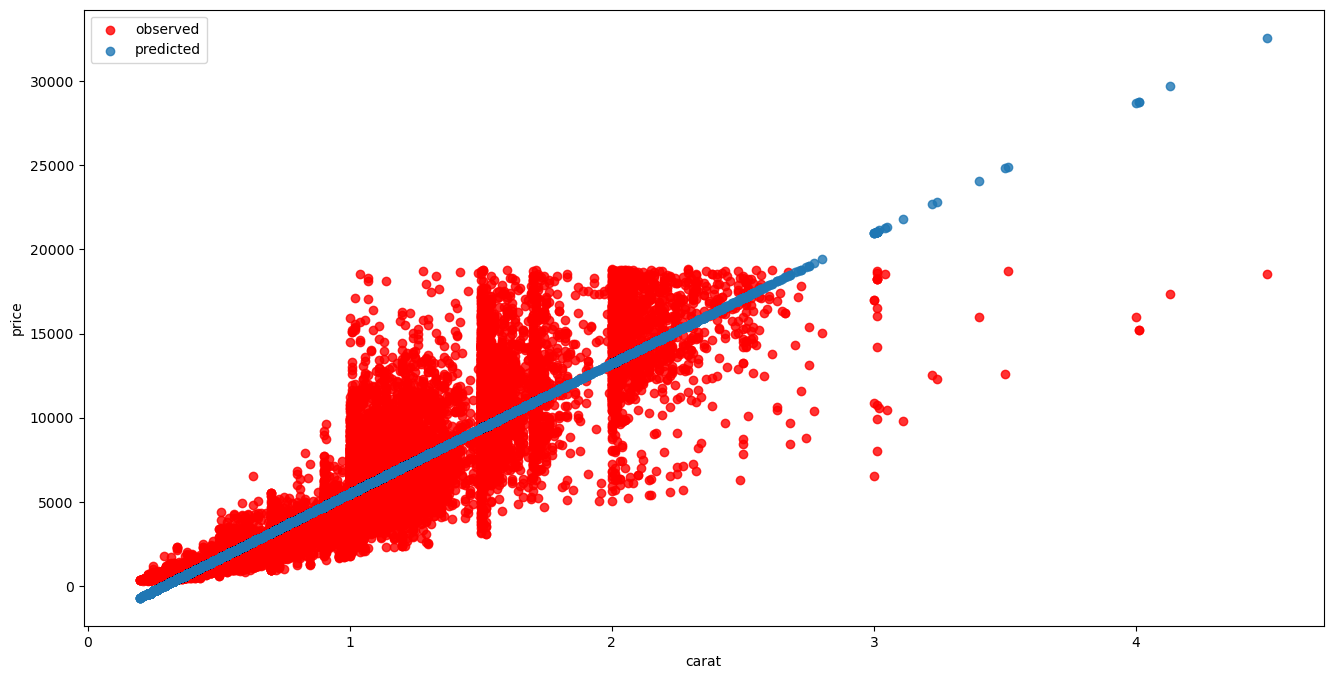

In [28]:
plt.figure(figsize=(16, 8))
plt.xlabel("carat")
plt.ylabel("price")
plt.scatter(X, Y, color="red", label="observed", alpha=0.8)

# plot the predicted values together with the observed values
plt.scatter(X, predict_price, label="predicted", alpha=0.8)
plt.legend();

In [29]:
np.sqrt(mean_squared_error(Y, model.predict(X)))

1546.0116540701824

In [30]:
#A model for all types of color
#a linear regression for each of the colors, using 'carat_log', 'cut_quality' and 'clarity_quality' as the independent variable to find the 'price_log' value.

In [31]:
# sorting out the dataframes for each color

df_hist1 = df_hist[df_hist["color"] == "D"]
df_hist2 = df_hist[df_hist["color"] == "E"]
df_hist3 = df_hist[df_hist["color"] == "F"]
df_hist4 = df_hist[df_hist["color"] == "G"]
df_hist5 = df_hist[df_hist["color"] == "H"]
df_hist6 = df_hist[df_hist["color"] == "I"]
df_hist7 = df_hist[df_hist["color"] == "J"]

In [32]:
# X and Y values of each dataframe

X1 = df_hist1[["carat_log", "cut_quality", "clarity_quality"]]
Y1 = df_hist1["price_log"]

X2 = df_hist2[["carat_log", "cut_quality", "clarity_quality"]]
Y2 = df_hist2["price_log"]

X3 = df_hist3[["carat_log", "cut_quality", "clarity_quality"]]
Y3 = df_hist3["price_log"]

X4 = df_hist4[["carat_log", "cut_quality", "clarity_quality"]]
Y4 = df_hist4["price_log"]

X5 = df_hist5[["carat_log", "cut_quality", "clarity_quality"]]
Y5 = df_hist5["price_log"]

X6 = df_hist6[["carat_log", "cut_quality", "clarity_quality"]]
Y6 = df_hist6["price_log"]

X7 = df_hist7[["carat_log", "cut_quality", "clarity_quality"]]
Y7 = df_hist7["price_log"]


In [33]:
df_hist1.head()

city_id       city  \
10  0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...  Amsterdam   
16  0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...  Amsterdam   
17  0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...  Amsterdam   
18  0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...  Amsterdam   
57  0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...  Amsterdam   

                                             index_id  price  carat  \
10  1dfacb2ea5a03e0a915999e03b5a56196f1b1664d2f768...   5283   1.23   
16  04a8708c3a481ced13845a30de522486895de0592222c2...   7915   1.51   
17  b3dfdc6efe322a6feccb0d081e88ffac20b0f28e8495ef...   3126   0.57   
18  b7c7470e59e2a2df1bfd0a4705488ee6fe0c5c125de15c...   3454   0.78   
57  b280279a0ef279d0b9f0bdc4162591dbbc6312abac6712...    756   0.32   

                                           clarity_id clarity  \
10  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
16  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
17  66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d8...    VVS1   
18  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
57  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...     SI1   

                                               cut_id  \
10  de88c121a82a06352bf1aaceba20578356408a334ba046...   
16  388655e25e91872329272fc10128ef5354b3b19a05d7e8...   
17  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
18  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
57  c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   

                                             color_id color  ... depth  table  \
10  3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...     D  ...  58.9   58.0   
16  3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...     D  ...  63.2   59.0   
17  3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...     D  ...  61.6   56.0   
18  3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...     D  ...  61.4   57.0   
57  3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...     D  ...  63.8   56.0   

       x     y     z  carat_log  price_log  cut_quality  color_quality  \
10  6.99  6.97  4.11   0.207014   8.572249            4              7   
16  7.25  7.18  4.56   0.412110   8.976515            3              7   
17  5.33  5.35  3.29  -0.562119   8.047510            5              7   
18  5.91  5.94  3.64  -0.248461   8.147288            5              7   
57  4.35  4.33  2.77  -1.139434   6.628041            2              7   

    clarity_quality  
10                2  
16                2  
17                6  
18                2  
57                3  

[5 rows x 21 columns]

In [34]:
# multivariable regression
# independent variables: 'carat_log', 'cut_quality' and 'clarity_quality'

model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()
model7 = LinearRegression()

model1.fit(X1, Y1)
model2.fit(X2, Y2)
model3.fit(X3, Y3)
model4.fit(X4, Y4)
model5.fit(X5, Y5)
model6.fit(X6, Y6)
model7.fit(X7, Y7)


LinearRegression()

In [35]:
model1.coef_[1]

0.036664286890210784

In [36]:
model1.coef_

array([1.88728987, 0.03666429, 0.17917275])

In [37]:
# estimated price calculation and transforming the calculated value from 'price_log' to 'price'
df_hist1["predict_price"] = np.exp(model1.predict(X1))
df_hist2["predict_price"] = np.exp(model2.predict(X2))
df_hist3["predict_price"] = np.exp(model3.predict(X3))
df_hist4["predict_price"] = np.exp(model4.predict(X4))
df_hist5["predict_price"] = np.exp(model5.predict(X5))
df_hist6["predict_price"] = np.exp(model6.predict(X6))
df_hist7["predict_price"] = np.exp(model7.predict(X7))

/var/folders/02/vh3glxc104g12c9mszmdd5fh0000gn/T/ipykernel_32824/1576286891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist1["predict_price"] = np.exp(model1.predict(X1))
/var/folders/02/vh3glxc104g12c9mszmdd5fh0000gn/T/ipykernel_32824/1576286891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist2["predict_price"] = np.exp(model2.predict(X2))
/var/folders/02/vh3glxc104g12c9mszmdd5fh0000gn/T/ipykernel_32824/1576286891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [38]:
#Single calculation of the Root Mean Squared Error (RMSE) for every Model

In [39]:
np.sqrt(mean_squared_error(df_hist1["price"], df_hist1["predict_price"]))

748.6281413458972

In [40]:
np.sqrt(mean_squared_error(df_hist2["price"], df_hist2["predict_price"]))

669.4533727271904

In [41]:
np.sqrt(mean_squared_error(df_hist3["price"], df_hist3["predict_price"]))

742.5925261123454

In [42]:
np.sqrt(mean_squared_error(df_hist4["price"], df_hist4["predict_price"]))

818.6102516902607

In [43]:
np.sqrt(mean_squared_error(df_hist5["price"], df_hist5["predict_price"]))

1036.9816999418301

In [44]:
np.sqrt(mean_squared_error(df_hist6["price"], df_hist6["predict_price"]))

1106.0089434927365

In [45]:
np.sqrt(mean_squared_error(df_hist7["price"], df_hist7["predict_price"]))

1095.95736470299

In [46]:
#Models 5, 6 and 7 resulted in a RMSE above 1000

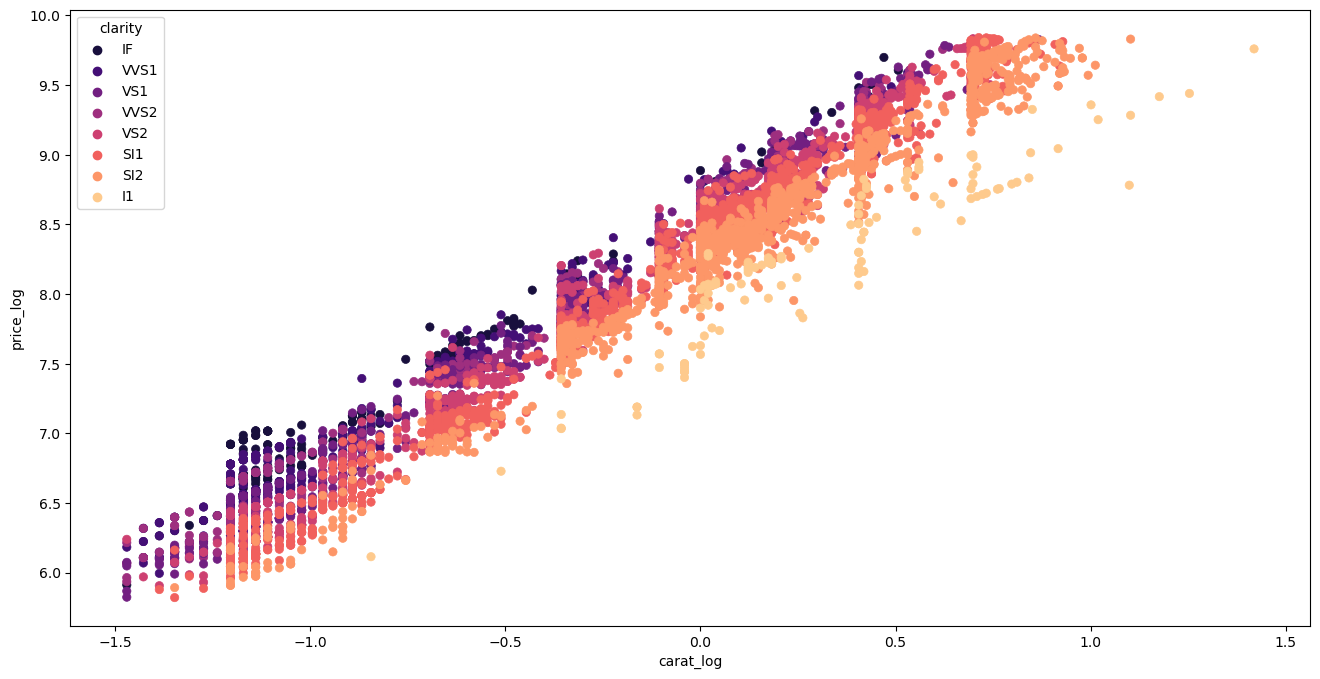

In [47]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist5.sort_values("clarity_quality", ascending=False),
    x="carat_log",
    y="price_log",
    hue="clarity",
    edgecolor=None,
    palette="magma",
);


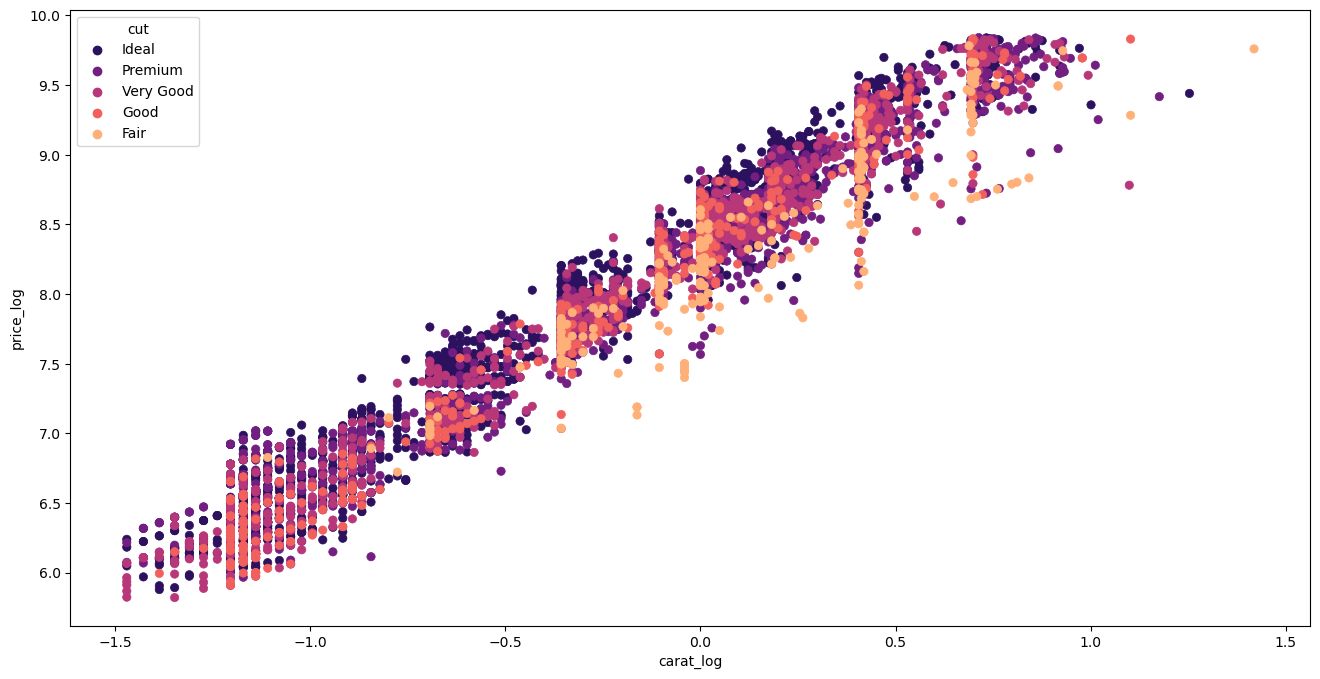

In [48]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist5.sort_values("cut_quality", ascending=False),
    x="carat_log",
    y="price_log",
    hue="cut",
    edgecolor=None,
    palette="magma",
);


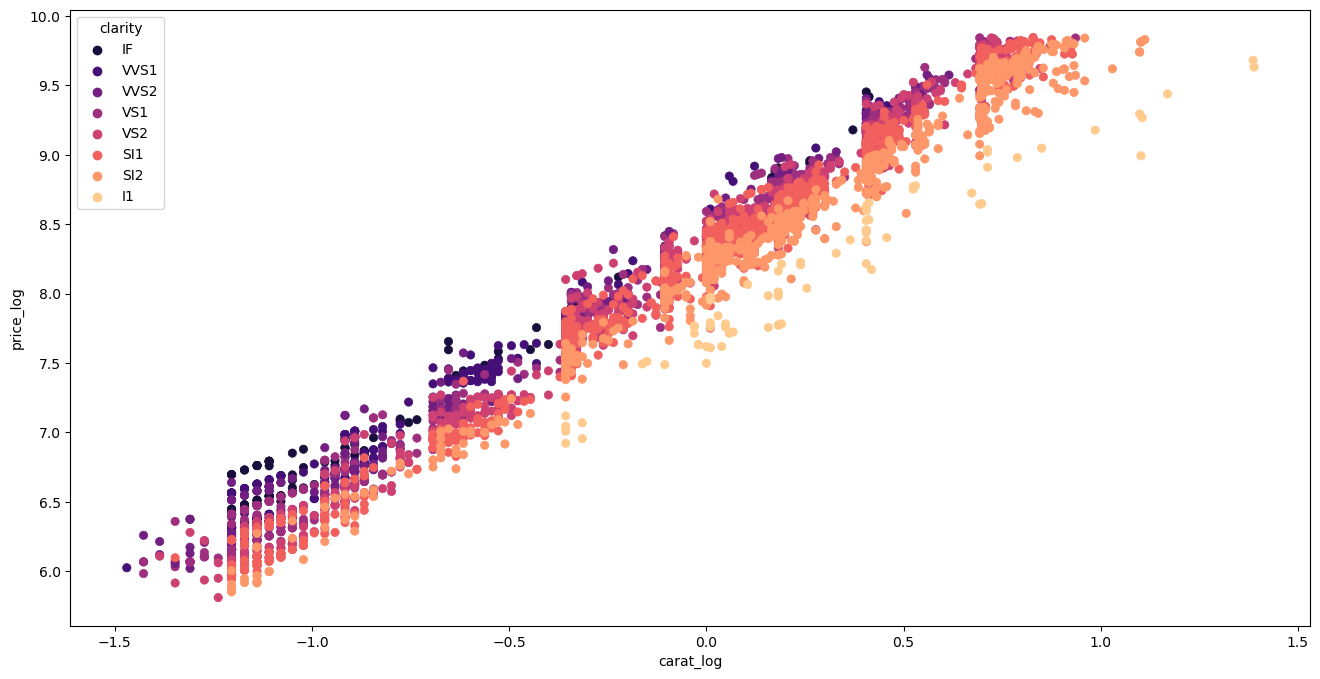

In [49]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist6.sort_values("clarity_quality", ascending=False),
    x="carat_log",
    y="price_log",
    hue="clarity",
    edgecolor=None,
    palette="magma",
);

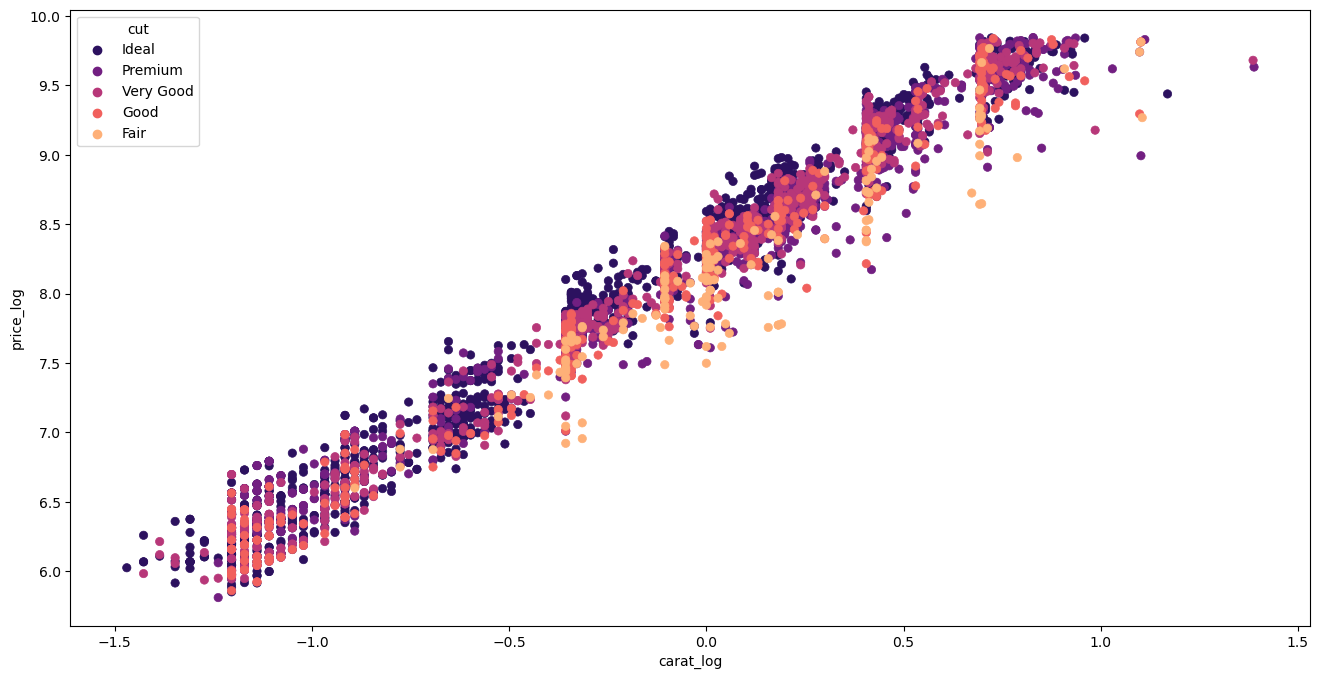

In [50]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist6.sort_values("cut_quality", ascending=False),
    x="carat_log",
    y="price_log",
    hue="cut",
    edgecolor=None,
    palette="magma",
);


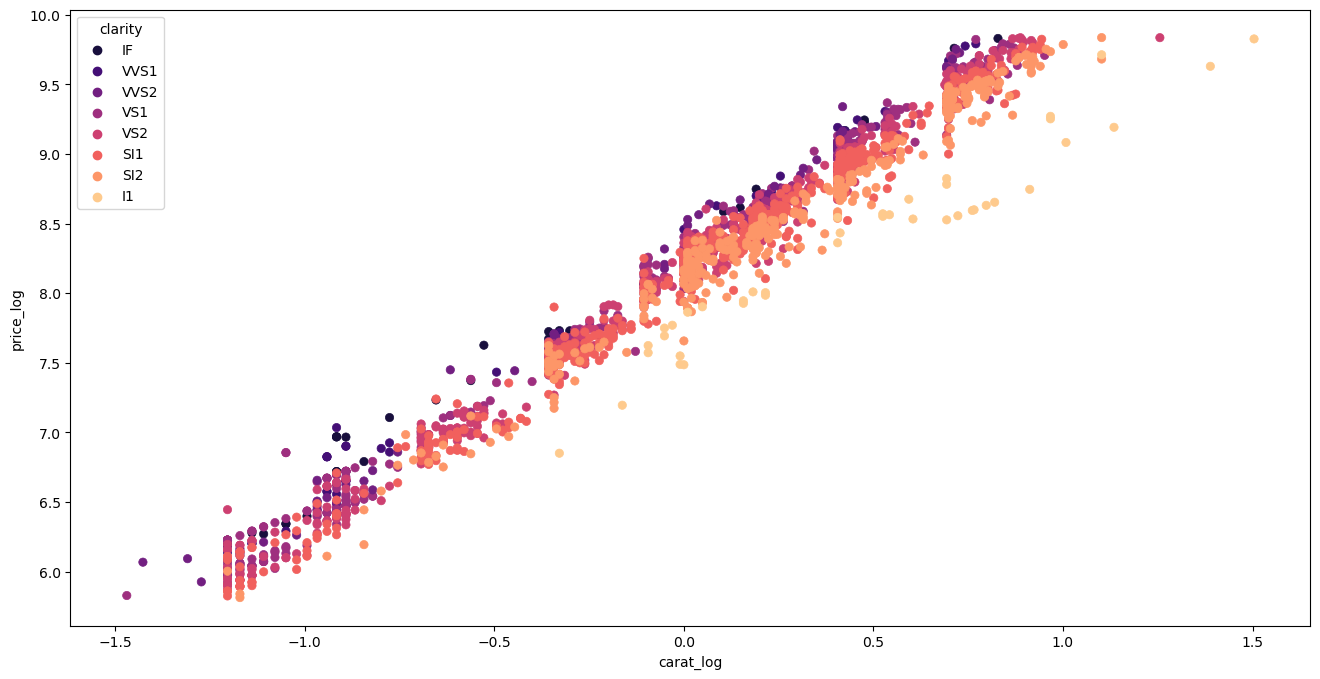

In [51]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist7.sort_values("clarity_quality", ascending=False),
    x="carat_log",
    y="price_log",
    hue="clarity",
    edgecolor=None,
    palette="magma",
);

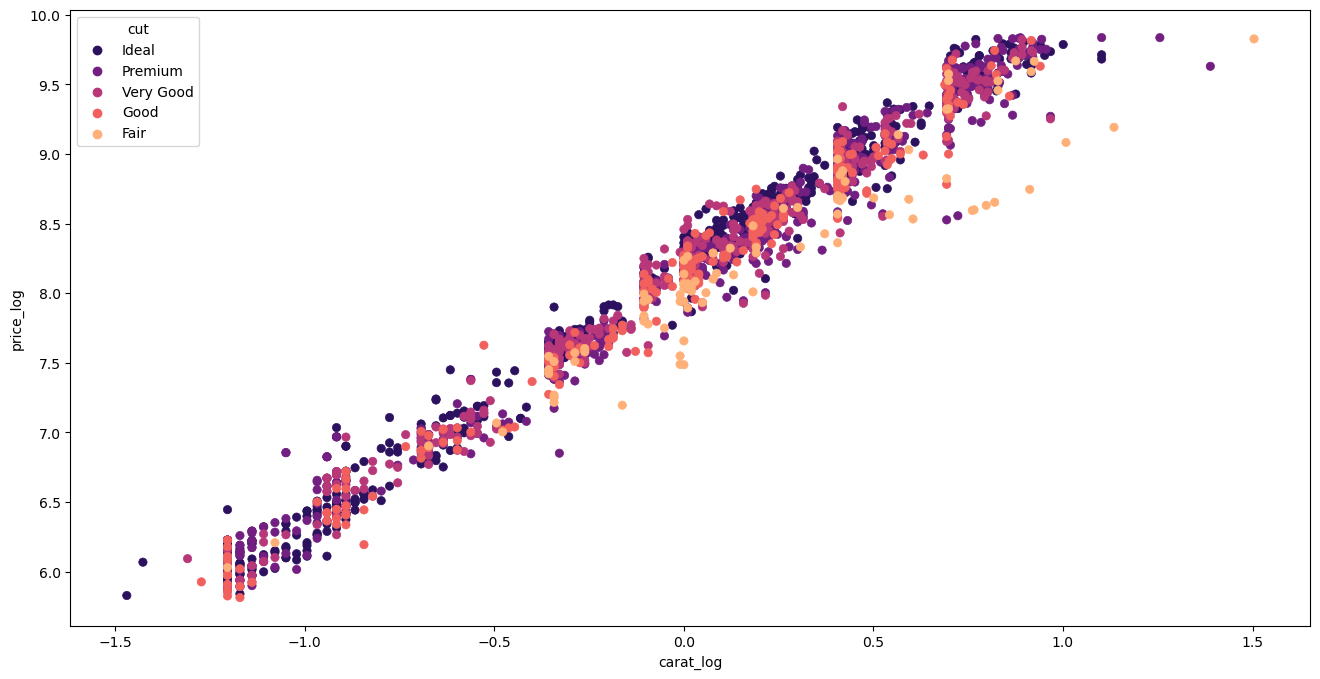

In [52]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist7.sort_values("cut_quality", ascending=False),
    x="carat_log",
    y="price_log",
    hue="cut",
    edgecolor=None,
    palette="magma",
);


In [53]:
# concatenating the models into one dataframe

df_hist_all = pd.concat(
    [df_hist1, df_hist2, df_hist3, df_hist4, df_hist5, df_hist6, df_hist7]
)
df_hist_all

city_id        city  \
10     0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
16     0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
17     0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
18     0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
57     0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...   Amsterdam   
...                                                  ...         ...   
40310  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40314  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40319  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40352  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   
40434  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...  Luxembourg   

                                                index_id  price  carat  \
10     1dfacb2ea5a03e0a915999e03b5a56196f1b1664d2f768...   5283   1.23   
16     04a8708c3a481ced13845a30de522486895de0592222c2...   7915   1.51   
17     b3dfdc6efe322a6feccb0d081e88ffac20b0f28e8495ef...   3126   0.57   
18     b7c7470e59e2a2df1bfd0a4705488ee6fe0c5c125de15c...   3454   0.78   
57     b280279a0ef279d0b9f0bdc4162591dbbc6312abac6712...    756   0.32   
...                                                  ...    ...    ...   
40310  97f9e4134301732caad587f6a661e766d9577cf76f1f49...   8298   1.51   
40314  c1eab3d99594e7a186ae016073f8c2773b318e591a36db...  12286   2.36   
40319  d2eea4ce126f238a8dff9e62fc58b5be9672306efd48ca...   4032   1.00   
40352  7a3a1616caf7cda9a3bfb1a35ce6316090d17707600245...    885   0.51   
40434  6a4490713063ded3aad43f37c39037f1884a12813910ca...   7840   1.50   

                                              clarity_id clarity  \
10     03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
16     03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
17     66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d8...    VVS1   
18     03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
57     bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...     SI1   
...                                                  ...     ...   
40310  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...     VS1   
40314  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
40319  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...     VS1   
40352  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2   
40434  3f9db06236e9719b61c826b612b882fa702ec81574e44c...    VVS2   

                                                  cut_id  \
10     de88c121a82a06352bf1aaceba20578356408a334ba046...   
16     388655e25e91872329272fc10128ef5354b3b19a05d7e8...   
17     4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
18     4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
57     c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
...                                                  ...   
40310  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40314  c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
40319  de88c121a82a06352bf1aaceba20578356408a334ba046...   
40352  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40434  388655e25e91872329272fc10128ef5354b3b19a05d7e8...   

                                                color_id color  ... table  \
10     3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...     D  ...  58.0   
16     3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...     D  ...  59.0   
17     3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...     D  ...  56.0   
18     3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...     D  ...  57.0   
57     3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...     D  ...  56.0   
...                                                  ...   ...  ...   ...   
40310  6da43b944e494e885e69af021f93c6d9331c78aa228084...     J  ...  61.0   
40314  6da43b944e494e885e69af021f93c6d9331c78aa228084...     J  ...  64.0   
40319  6da43b944e494e885e69af021f93c6d9331c78aa228084...     J  

In [54]:
#Calculation of the Root Mean Squared Error (RMSE) for all dataset
np.sqrt(mean_squared_error(df_hist_all["price"], df_hist_all["predict_price"]))

860.9630448360788

In [60]:
df_hist_all.head()

city_id  predict_price
10  0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...    6461.196125
16  0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...    9172.636850
17  0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...    3214.245551
18  0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...    2837.332627
57  0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...     565.819652

In [56]:
df_hist_all.columns

Index(['city_id', 'city', 'index_id', 'price', 'carat', 'clarity_id',
       'clarity', 'cut_id', 'color_id', 'color', 'cut', 'depth', 'table', 'x',
       'y', 'z', 'carat_log', 'price_log', 'cut_quality', 'color_quality',
       'clarity_quality', 'predict_price'],
      dtype='object')

In [57]:
columns_to_drop = ["index_id", "city", "price", "carat", "clarity_id", "clarity", "cut_id", "cut","color_id", "color", "table", "x", "y", "z", "carat_log", "price_log", "cut_quality", "color_quality", "clarity_quality", "depth"]

# Check if columns exist before dropping
columns_to_drop_existing = [col for col in columns_to_drop if col in df_hist_all.columns]
df_hist_all.drop(columns=columns_to_drop_existing, inplace=True)

(df_hist_all)

city_id  predict_price
10     0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...    6461.196125
16     0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...    9172.636850
17     0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...    3214.245551
18     0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...    2837.332627
57     0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...     565.819652
...                                                  ...            ...
40310  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...    8382.545356
40314  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...   13803.391751
40319  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...    3858.455133
40352  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...     908.347019
40434  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...    7888.596289

[40439 rows x 2 columns]